In [10]:
using LinearAlgebra  #####Son las paqueterias que uso, para instalar una paqueteria basta colocar Pkg.add("Nombre_de_la_paqueteria")
using Plots
using SpecialFunctions: gamma
using Random, Distributions
using Alert

In [11]:
function OUH(x0::Float64,γ::Float64,t::AbstractArray,Δt::Float64,η::Float64,cte::Float64=0.0) #Proceso de Ornstein–Uhlenbeck
    x=Vector{Float64}(undef, length(t)) #Definimos un vector lleno de basura para luego sobre escribir en el 
    x[1]=x0    #La primera entrada es la condicion inicial del Proceso de Ornstein–Uhlenbeck
    
    for i=1:length(t)                 #Usamos un for para poder hacer el proceso
        x0=x0-γ*Δt*(x0-cte)+(η*sqrt(Δt)*randn()) # Es el proceso de Ornstein–Uhlenbeck que depende del paso anterior 
        @inbounds x[1+i]=x0                 #@inbounds ignora si la lista tiene el tamaño adecuado y sobreescribimos en la lista basura
    end
    return x                          # Devolvemos la caminata de Ornstein–Uhlenbeck
end

OUH (generic function with 2 methods)

In [12]:
function eigen2(n::Int64,K::Array{Float64,1},T::Array{Float64,1},Δt::Float64) 
    R=diagm(0 =>ones(3)) #Hacemos una matriz llena de unos en la diagonal de dimension 2
    for i=1:n            #Hacemos un for donde n es la cantidad de pasos de t, pasos de tiempo
       R=(diagm(0 => ones(3))+diagm(1 => [K[i],T[i]]*Δt,-1 => -[K[i],T[i]]*Δt)+(0.5*diagm(1 => [K[i],T[i]]*Δt,-1 => -[K[i],T[i]]*Δt)^2))*R #Hacemos los pasos de multiplicar la matriz por la matriz anterior 
    end
    eigen(R) #Obtenemos el eigenvalor y eigenvector
end

eigen2 (generic function with 1 method)

In [13]:
function Mat(n::Int64,K::Array{Float64,1},T::Array{Float64,1},Δt::Float64) 
    R=diagm(0 =>ones(3))
    for i=1:n
       R=(diagm(0 => ones(3))+diagm(1 => [K[i],T[i]]*Δt,-1 => -[K[i],T[i]]*Δt)+(0.5*diagm(1 => [K[i],T[i]]*Δt,-1 => -[K[i],T[i]]*Δt)^2))*R
    end
    R
end


Mat (generic function with 1 method)

In [14]:
function Mat1(n::Int64) 
       R=(diagm(0 => ones(3))+diagm(1 => [K[n],T[n]]*Δt,-1 => -[K[n],T[n]]*Δt)+(0.5*diagm(1 => [K[n],T[n]]*Δt,-1 => -[K[n],T[n]]*Δt)^2))
    return R
end


Mat1 (generic function with 1 method)

In [15]:
function Trayectoria(Δt::Float64,t::AbstractArray,K::AbstractArray,T::AbstractArray)
    #T=ones(2001)*5
    #K=ones(2001)*5

    #T_v0=(eigen2(2,K,T,Δt).vectors)[:,1]      #Es el vector tangente inicial
    #N_v0=(eigen2(2,K,T,Δt).vectors)[:,2]*im   #Es el vector tangente inicial
    #B_v0=(eigen2(2,K,T,Δt).vectors)[:,3]      #Es el vector tangente inicial
    T_v0=[1.0,0.0,0.0]     #Es el vector tangente inicial
    N_v0=[0.0,1.0,0.0]   #Es el vector tangente inicial
    B_v0=[0.0,0.0,1.0]      #Es el vector tangente inicial
    ##########################################
    T_v=Array{Float64,1}[]       #Lista vacia para todos los vectores tangentes
    N_v=Array{Float64,1}[]       #Lista vacia para todos los vectores tangentes
    B_v=Array{Float64,1}[]       #Lista vacia para todos los vectores tangentes
    for i=1:length(t)                 #For que dura todos los pasos de tiempo
        T_v0=Mat1(i)*T_v0      #Genera todos los vecotres tangentes a partir del inicial
        N_v0=Mat1(i)*N_v0      #Genera todos los vecotres tangentes a partir del inicial
        B_v0=Mat1(i)*B_v0      #Genera todos los vecotres tangentes a partir del inicial
        push!(T_v,real(T_v0))    #Coloca los vectores tangentes en una lista
        push!(N_v,real(N_v0))    #Coloca los vectores tangentes en una lista
        push!(B_v,real(B_v0))    #Coloca los vectores tangentes en una lista
    end
    T_v=transpose(hcat(T_v...))     #Transforma T en algo mejor
    N_v=transpose(hcat(N_v...))     #Transforma N en algo mejor
    B_v=transpose(hcat(B_v...))     #Transforma B en algo mejor
    ##########################################
    Tx=T_v[:,1]
    Ty=T_v[:,2]
    Tz=T_v[:,3]
    ##########################################
    rx=Float64[]
    ry=Float64[]
    rz=Float64[]
    r1x=0.0
    r1y=0.0
    r1z=0.0
    for i=1:length(t)
        r1x=Tx[i]*Δt+r1x
        r1y=Ty[i]*Δt+r1y
        r1z=Tz[i]*Δt+r1z
        push!(rx,r1x)
        push!(ry,r1y)
        push!(rz,r1z)
    end
    r=[rx,ry,rz]
    T=[Tx,Ty,Tz]
    N=[N_v[:,1],N_v[:,2],N_v[:,3]]
    B=[B_v[:,1],B_v[:,2],B_v[:,3]]
    return r,T,N,B
end



Trayectoria (generic function with 1 method)

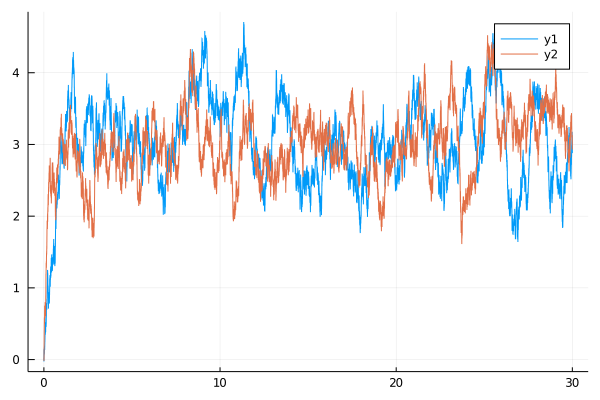

In [16]:
k0=0.01
t0=0.01
γK=2.0
γT=2.0
ηK=1.0
ηT=1.0
Δt=0.001
N=30.0
t=0:Δt:N
K=OUH(k0,γK,t,Δt,ηK,3.0)
T=OUH(t0,γT,t,Δt,ηT,3.0);
plot(t,K)
plot!(t,T)

In [17]:
@time r,Tm,Nm,Bm=Trayectoria(Δt,t,K,T);

  0.759280 seconds (8.92 M allocations: 367.131 MiB, 11.19% gc time)


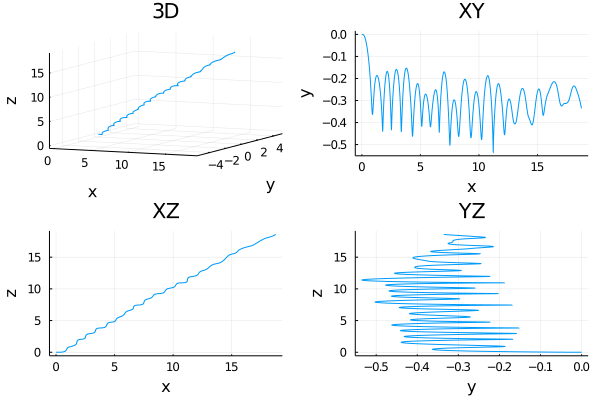

In [18]:
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
P1=plot(r[1],r[2],r[3], legend=false,title="3D",aspect_ratio=:equal,xlabel="x",ylabel="y",zlabel="z")
P2=plot(r[1],r[2],legend=false,title="XY",xlabel="x",ylabel="y")
P3=plot(r[1],r[3],legend=false,title="XZ",xlabel="x",ylabel="z")
P4=plot(r[2],r[3],legend=false,title="YZ",xlabel="y",ylabel="z")
plot(P1,P2,P3,P4,layout=l)

In [39]:
using BenchmarkTools

In [41]:
@benchmark Trayectoria($Δt,$t,$K,$T)

BenchmarkTools.Trial: 
  memory estimate:  238.56 MiB
  allocs estimate:  5806646
  --------------
  minimum time:     385.676 ms (8.52% GC)
  median time:      409.331 ms (10.07% GC)
  mean time:        427.519 ms (13.77% GC)
  maximum time:     561.246 ms (33.93% GC)
  --------------
  samples:          12
  evals/sample:     1